In [903]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea


In [347]:
risposte=pd.read_csv('questionario_risposte_1.csv',header=0)

Si considerano solo gli attributi di interesse e trasponiamo la tabella

In [348]:
risp_mappe=risposte[risposte.columns[2:8]]
risp_serie=risposte[risposte.columns[8:]]
#risposte=risposte.T

In [349]:
risp_serie.columns=list(risp_mappe.columns)

Trasformiamo i valori assoluti in percentuali

In [350]:
#risp_mappe=risp_mappe.T
#risp_serie=risp_serie.T

In [351]:
#risp_mappe.reset_index(inplace=True)
#risp_mappe.columns=['dim_analisi']+list(risp_mappe.columns[1:])

In [352]:
#risp_serie.reset_index(inplace=True)
#risp_serie.columns=['dim_analisi']+list(risp_serie.columns[1:])

In [369]:
g4=(risp_mappe.iloc[:]>4).sum()
u3=((risp_mappe.iloc[:]==3)).sum()
u4=((risp_mappe.iloc[:]==4)).sum()
m2=(risp_mappe.iloc[:]<3).sum()

In [370]:
freq_ass_mappe=pd.DataFrame(data={'<3':m2, '==3':u3, '==4':u4, '>4':g4})

In [371]:
g4=(risp_serie.iloc[:]>4).sum()
u3=((risp_serie.iloc[:]==3)).sum()
u4=((risp_serie.iloc[:]==4)).sum()
m2=(risp_serie.iloc[:]<3).sum()

In [372]:
freq_ass_serie=pd.DataFrame(data={'<3':m2, '==3':u3, '==4':u4, '>4':g4})

In [373]:
n=len(risp_mappe)

In [450]:
freq_rel_mappe=round((freq_ass_mappe/n)*100,4)
freq_rel_mappe.columns=['<3(%)','==3(%)','==4(%)','>4(%)']

freq_rel_serie=round((freq_ass_serie/n)*100,4)
freq_rel_serie.columns=['<3(%)','==3(%)','==4(%)','>4(%)']

In [451]:
freq_rel_mappe.reset_index(inplace=True)
freq_rel_mappe.columns=['dim_analisi']+list(freq_rel_mappe.columns[1:])

freq_rel_serie.reset_index(inplace=True)
freq_rel_serie.columns=['dim_analisi']+list(freq_rel_serie.columns[1:])

In [452]:
freq_rel_mappe['==3/4(%)']=freq_rel_mappe['==3(%)']+freq_rel_mappe['==4(%)']
freq_rel_mappe['-(==3(%))']=-freq_rel_mappe['==3(%)']
freq_rel_mappe['-(<3(%))']=-freq_rel_mappe['<3(%)']

freq_rel_serie['==3/4(%)']=freq_rel_serie['==3(%)']+freq_rel_serie['==4(%)']
freq_rel_serie['-(==3(%))']=-freq_rel_serie['==3(%)']
freq_rel_serie['-(<3(%))']=-freq_rel_serie['<3(%)']

Calcoliamo la proporzione dei valori positivi e negativi incerti

In [556]:
freq_rel_mappe['uncertain']=[freq_ass_mappe['==4'][i]/(freq_ass_mappe['==3'][i]+freq_ass_mappe['==4'][i]) for i in range(6)]
freq_rel_serie['uncertain']=[freq_ass_serie['==4'][i]/(freq_ass_serie['==3'][i]+freq_ass_serie['==4'][i]) for i in range(6)]

Calcoliamo l'intervallo di confidenza per i valori di uncertain

In [659]:
z=1.96
n=len(risposte)

In [660]:
freq_rel_mappe['inf_lim']=[freq_rel_mappe['uncertain'][i]-z*(freq_rel_mappe['uncertain'][i]*(1-freq_rel_mappe['uncertain'][i])/n)**0.5 for i in range(6)]
freq_rel_mappe['sup_lim']=[freq_rel_mappe['uncertain'][i]+z*(freq_rel_mappe['uncertain'][i]*(1-freq_rel_mappe['uncertain'][i])/n)**0.5 for i in range(6)]

freq_rel_serie['inf_lim']=[freq_rel_serie['uncertain'][i]-z*(freq_rel_serie['uncertain'][i]*(1-freq_rel_serie['uncertain'][i])/n)**0.5 for i in range(6)]
freq_rel_serie['sup_lim']=[freq_rel_serie['uncertain'][i]+z*(freq_rel_serie['uncertain'][i]*(1-freq_rel_serie['uncertain'][i])/n)**0.5 for i in range(6)]

In [661]:
freq_rel_mappe

,dim_analisi,<3(%),==3(%),==4(%),>4(%),==3/4(%),-(==3(%)),-(<3(%)),uncertain,inf_lim,sup_lim
0,Utilità,0.0000,0.0000,17.2414,82.7586,17.2414,-0.0000,-0.0000,1.000000,1.000000,1.000000
1,Intuitività,0.0000,0.0000,27.5862,72.4138,27.5862,-0.0000,-0.0000,1.000000,1.000000,1.000000
2,Chiarezza,0.0000,3.4483,34.4828,62.0690,37.9311,-3.4483,-0.0000,0.909091,0.804459,1.013723
3,Informatività,0.0000,0.0000,17.2414,82.7586,17.2414,-0.0000,-0.0000,1.000000,1.000000,1.000000
4,Bellezza estetica,3.4483,6.8966,34.4828,55.1724,41.3794,-6.8966,-3.4483,0.833333,0.697692,0.968974
5,Di valore,0.0000,3.4483,17.2414,79.3103,20.6897,-3.4483,-0.0000,0.833333,0.697692,0.968974


Initialize the matplotlib figure

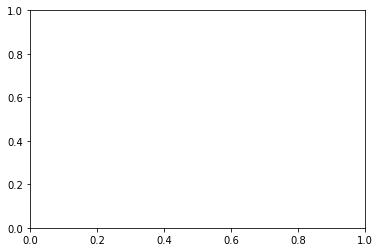

In [453]:
f, ax = plt.subplots()

In [1172]:
def survey(labels, data, category_names, ic, data_cum):
    """
    Parameters
    ----------
    category_names : list of str
        The category labels.
    """
    labels=list(labels)
    data = np.array(data)
    category_colors = ['#000099','#b3b3b3','#cc0000']

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(-100,100)
    
    ax.set_xticks(ax.get_xticks(), ['100','75','50','25','0','25','50','75','100'])

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = abs(data[:, i])
        starts = data_cum.iloc[:, i]
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                     label=colname,color=color)

        #r, g, b, _ = color
        #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        #ax.bar_label(rects, label_type='center', color=text_color)
        ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


        for i in range(len(labels)):
            centro=ic['uncertain'][i]*2*data_cum.iloc[i,2]
            diff=data_cum.iloc[i,2]
            lunghezza=(ic['sup_lim'][i]-ic['inf_lim'][i])*2*data_cum.iloc[i,2]
            ax.add_artist(Rectangle((centro-diff-lunghezza/2,i-0.2/2),lunghezza,0.2, color='black'))
            

        plt.grid(True, axis='x', color='black', alpha=0.5, linestyle='--')

    return fig

In [1173]:
col=['-(<3(%))','==3/4(%)','>4(%)']
col1=['1-2','3-4','5-6']

In [1174]:
data=freq_rel_mappe
data_cum = pd.DataFrame(data={'first':data['-(<3(%))']-data['==3/4(%)']/2,'second':-data['==3/4(%)']/2,'third':data['==3/4(%)']/2})

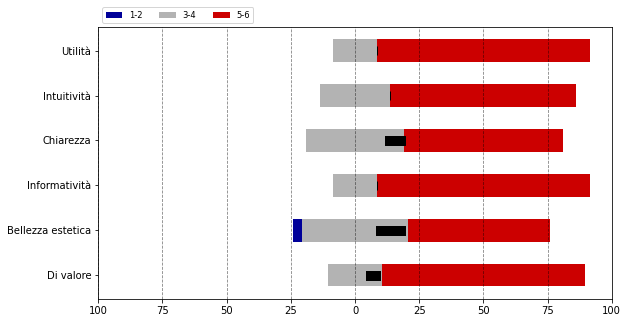

In [1175]:
graph1=survey(data['dim_analisi'],data[col],col1,data[['uncertain','inf_lim','sup_lim']],data_cum)

In [1176]:
data=freq_rel_serie
data_cum = pd.DataFrame(data={'first':data['-(<3(%))']-data['==3/4(%)']/2,'second':-data['==3/4(%)']/2,'third':data['==3/4(%)']/2})

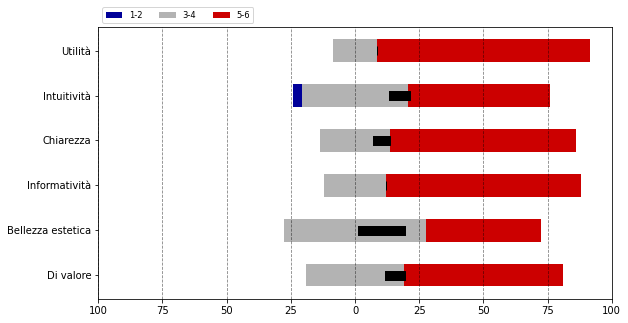

In [1177]:
graph2=survey(data['dim_analisi'],data[col],col1,data[['uncertain','inf_lim','sup_lim']],data_cum)

In [1178]:
data=freq_rel_serie[col]#).cumsum(axis=1)

In [1181]:
graph1.savefig('stacked_barchart_choroplet')
graph2.savefig('stacked_barchart_time_series')